In [343]:
# -*- coding: utf-8 -*-
# Initial setup

%precision 3
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


path = 'machine-learning-ex1/ex1/'

## 1. Linear Regression with One Variable

### 1.1 Examine Data

In [344]:
# Prepare data
population = ([map(float, line.strip().split(',')) 
               for line in open(path + 'ex1data1.txt')])
population = np.array(population)
m = len(population)
X, y = population[:, 0].reshape([m, 1]), population[:, 1].reshape([m, 1])

# add x0=1
X = np.hstack([np.ones([m, 1]), X])

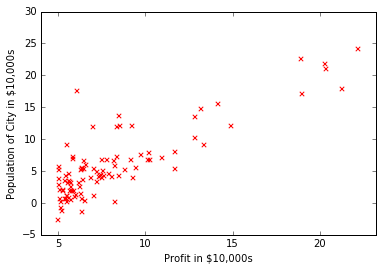

In [345]:
# Plot data
plt.scatter(x=X[:, 1], y=y, c='r', marker='x')
plt.xlim([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in $10,000s')
plt.show()

### 1.2 Gradient Descent

In [346]:
# Initialize parameters
theta = np.zeros(X.shape[-1])

# Define cost function
def compute_cost(theta, X, y):
    m, n = X.shape
    predictions = X.dot(theta.reshape([1, n]).T) - y
    sqr_errs = predictions**2
    J = sum(sqr_errs)/(2*m)
    return J

j = compute_cost(theta, X, y)
j

array([ 32.07273388])

In [347]:
# Define gradient descent
num_iters = 1500
alpha = 0.01

def gradient_descent(theta, X, y, alpha, num_iters):
    m, n = X.shape
    theta_hist = np.zeros([num_iters, n])
    j_hist = np.zeros([num_iters, 1])
    for i in range(num_iters):
        predictions = X.dot(theta.reshape([1, n]).T) - y
        theta = theta - (alpha/m)*sum(predictions*X)
        '''
        # Caculating partial derivatives for linear regression with one variable
        theta[0] = theta[0] - ((alpha / m) * sum(predictions))
        theta[1] = theta[1] - ((alpha / m) * sum(predictions * X[:, 1].reshape([m, 1])))
        '''
        theta_hist[i] = theta
        j_hist[i] = compute_cost(theta, X, y)
    return theta_hist, j_hist 
        
theta_hist, cost_hist = gradient_descent(theta, X, y, alpha, num_iters)

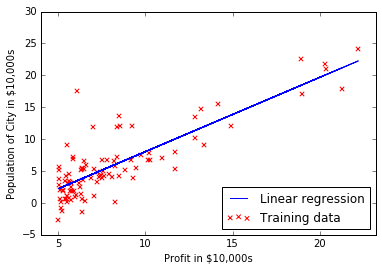

In [348]:
# Plot data
plt.scatter(x=X[:, 1], y=y, c='red', marker='x')
plt.xlim([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in $10,000s')

# Add linear regression fit
plt.plot(X[:, 1], X.dot(theta_hist[-1].T))
plt.legend(['Linear regression', 'Training data'], loc='lower right')
plt.show()

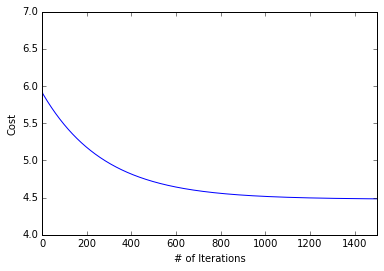

In [349]:
# Visualize the optimization of cost function J: line chart
plt.plot(cost_hist)
plt.xlim([0, num_iters])
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.show()

In [114]:
# Compute cost matrix Z for surface and contour plots
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)
Z = np.zeros([len(theta0), len(theta1)])

for i in range(len(theta0)):
    for j in range(len(theta1)):
        theta = np.array([theta0[i], theta1[j]])
        Z[i, j] = compute_cost(theta, X, y)

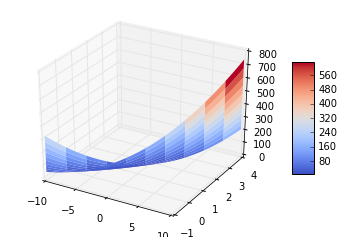

In [350]:
# Visualize the optimization of cost function J: surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
ax.plot_surface(theta0, theta1, Z, 
                cmap=cm.coolwarm, linewidth=0, antialiased=True)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

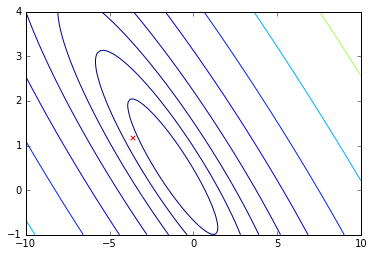

In [351]:
# Visualize the optimization of cost function J: contour plot
# Plot Js as 20 contours spaced logarithmically between 0.01 and 100
N = np.logspace(-2, 3, 20)

# Plot the contour
plt.contour(theta0, theta1, Z, levels=N)

# Plot the optimized thetas
plt.scatter(theta_hist[-1, 0], theta_hist[-1, 1], c='r', marker='x')
plt.xlim([np.min(theta0), np.max(theta0)])
plt.ylim([np.min(theta1), np.max(theta1)])

plt.show()

## 2. Linear Regression with Multiple Variables

In [397]:
# Prepare data
housing = ([map(float, line.strip().split(',')) 
         for line in open(path + 'ex1data2.txt')])
housing = np.array(housing)
m = len(housing)
X, y = housing[:, [0, 1]].reshape([m, 2]), housing[:, 2].reshape([m, 1])

In [394]:
# Define feature normalization
def feature_normalize(X):
    mu, sigma = np.mean(X, axis=0), np.std(X, axis=0)
    norm_X = (X - mu)/sigma
    return norm_X

norm_X = feature_normalize(X)

# add x0=1
norm_X = np.hstack([np.ones([m, 1]), norm_X])

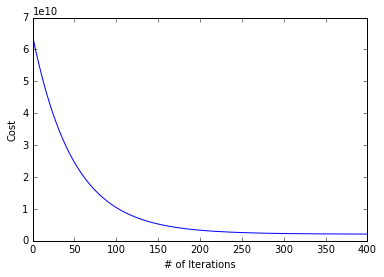

In [395]:
# Initialize settings
num_iters = 400
theta = np.zeros([norm_X.shape[-1]])
alpha = 0.01

norm_thetas, norm_costs = gradient_descent(theta, norm_X, y, alpha, num_iters)

# Visualize the optimization of cost function J: line chart
plt.plot(norm_costs)
plt.xlim([0, num_iters])
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.show()

In [400]:
# Compare normalized features and non-normalized features
# add x0=1

#X = np.hstack([np.ones([m, 1]), X])
#X
#thetas, costs = gradient_descent(theta, X, y, alpha, num_iters) >> overflows

/opt/ds/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/opt/ds/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in add
/opt/ds/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract


## 3. Normal Equations

In [355]:
# Define normal equation
def norm_equation(X, y):
    X = np.hstack([np.ones([len(X), 1]), X])
    params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return params[:, 0]

print norm_thetas[-1] # Batch gradient descent
print norm_equation(X, y)# Normal equation

[ 334302.06399328   99411.44947359    3267.01285407]
[ 89597.9095428     139.21067402  -8738.01911233]


In [356]:
# Prepare a test case of a 1650 sq-ft, 3 br house
test = np.array([1, 1650, 3])

# Predict with params from batch gradient descent
print test.dot(norm_thetas[-1])

# Predict with params from normal equation
print test.dot(norm_equation(X, y))

164372994.734
293081.464335


## 4. Regularization and Parameter Learning Optimization

### 4.1 Regularization

In [357]:
# Set lambda
L = 100

# Define regulaized cost function
def reg_compute_cost(theta, X, y, L):
    m, n = X.shape
    predictions = X.dot(theta.reshape([1, n]).T) - y
    sqr_errs = predictions**2
    reg = theta[1:]**2
    J = (sum(sqr_errs) + L*sum(reg))/(2*m)
    return J

reg_compute_cost(theta, norm_X, y, L)

array([  6.55915481e+10])

In [358]:
# Define regulaized gradient descent
def reg_gradient_descent(theta, X, y, alpha, L, num_iters):
    m, n = X.shape
    theta_hist = np.zeros([num_iters, n])
    j_hist = np.zeros([num_iters, 1])
    for i in range(num_iters):
        predictions = X.dot(theta.reshape([1, n]).T) - y
        theta = (theta
                 - (alpha*L*np.hstack([np.zeros(1), theta[1:]]))/m
                 - (alpha/m)*sum(predictions*X))
        theta_hist[i] = theta
        j_hist[i] = compute_cost_reg(theta, X, y, L)
    return theta_hist, j_hist 

reg_thetas, reg_costs = reg_gradient_descent(theta, norm_X, y, alpha, L, num_iters)

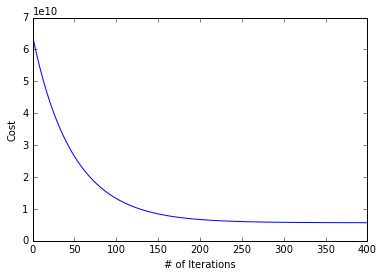

In [359]:
# Visualize the optimization of regulaized cost function J: line chart
plt.plot(reg_costs)
plt.xlim([0, num_iters])
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.show()

In [360]:
# Define regularized normal equation
def reg_norm_equation(X, y, L):
    X = np.hstack([np.ones([len(X), 1]), X])
    n = X.shape[-1]
    N = np.eye(n)
    N[0, 0] = 0
    params = np.linalg.inv(X.T.dot(X) + L*N).dot(X.T).dot(y)
    return params[:, 0]

print norm_thetas[-1] # Batch gradient descent
print reg_thetas[-1] # Regularized batch gradient descent
print norm_equation(X, y)# Normal equation
print reg_norm_equation(X, y, L) # Regularized normal equation

[ 334302.06399328   99411.44947359    3267.01285407]
[ 334302.06399328   31699.85611652   11816.72438508]
[ 89597.9095428     139.21067402  -8738.01911233]
[ 74104.49190001    135.24909325  -1350.7305738 ]


In [361]:
# test = [1, 1650, 3]
# Predict with params from batch gradient descent
print test.dot(norm_thetas[-1])

# Predict with params from regularized batch gradient descent
print test.dot(reg_thetas[-1])

# Predict with params from normal equation
print test.dot(norm_equation(X, y))

# Predict with params from regularized normal equation
print test.dot(reg_norm_equation(X, y, L))

164372994.734
52674514.8294
293081.464335
293213.304036


### 4.2 Parameter Learning Optimization

In [362]:
# Define cost and gradient methods
def cost(theta, X, y):
    m, n = X.shape
    predictions = X.dot(theta.reshape([1, n]).T) - y
    sqr_errs = predictions**2
    J = sum(sqr_errs)/(2*m)
    return J

def gradient(theta, X, y):
    m, n = X.shape
    predictions = X.dot(theta.reshape([1, n]).T) - y
    grad = sum(predictions*X)/m
    return grad

In [379]:
# Use scipy.optimize for parameter learning
import scipy.optimize as opt


X = np.hstack([np.ones([len(X), 1]), X])
opt_result = opt.minimize(fun=cost, 
                      x0=theta,
                      args=(X, y), 
                      method='TNC', 
                      jac=gradient)

In [382]:
# Compare learned parameters
print norm_thetas[-1] # Batch gradient descent
print reg_thetas[-1] # Regularized batch gradient descent
print opt_result.x # Optimized batch gradient descent
print norm_equation(X, y)# Normal equation
print reg_norm_equation(X, y, L) # Regularized normal equation

[ 334302.06399328   99411.44947359    3267.01285407]
[ 334302.06399328   31699.85611652   11816.72438508]
[ 6104.00422678   150.99474009  8656.92978588]
[ 89597.9095428     139.21067402  -8738.01911233]
[ 74104.49190001    135.24909325  -1350.7305738 ]


In [383]:
# test = [1, 1650, 3]
# Predict with params from batch gradient descent
print test.dot(norm_thetas[-1])

# Predict with params from regularized batch gradient descent
print test.dot(reg_thetas[-1])

# Predict with params from Optimized batch gradient descent
print test.dot(opt_result.x)

# Predict with params from normal equation
print test.dot(norm_equation(X, y))

# Predict with params from regularized normal equation
print test.dot(reg_norm_equation(X, y, L))

164372994.734
52674514.8294
281216.114728
293081.464335
293213.304036


### 4.3 Parameter Learning Optimization with Regularization

In [384]:
# Define cost and gradient methods
def reg_cost(theta, X, y, L):
    m, n = X.shape
    predictions = X.dot(theta.reshape([1, n]).T) - y
    sqr_errs = predictions**2
    reg = theta[1:]**2
    J = (sum(sqr_errs) + L*sum(reg))/(2*m)
    return J

def reg_gradient(theta, X, y, L):
    m, n = X.shape
    predictions = X.dot(theta.reshape([1, n]).T) - y
    grad = (sum(predictions*X)/m
            + (L*np.hstack([np.zeros(1), theta[1:]]))/m)
    return grad

In [385]:
X = np.hstack([np.ones([len(X), 1]), X])
reg_opt_result = opt.minimize(fun=reg_cost, 
                      x0=theta,
                      args=(X, y, L), 
                      method='TNC', 
                      jac=reg_gradient)

In [386]:
reg_opt_result.x

array([ 6617.32847019,   156.52959976,  4581.60383981])

In [388]:
# Compare learned parameters
print norm_thetas[-1] # Batch gradient descent
print reg_thetas[-1] # Regularized batch gradient descent
print opt_result.x # Optimized batch gradient descent
print reg_opt_result.x # Regularized optimized gradient descent
print norm_equation(X, y)# Normal equation
print reg_norm_equation(X, y, L) # Regularized normal equation

[ 334302.06399328   99411.44947359    3267.01285407]
[ 334302.06399328   31699.85611652   11816.72438508]
[ 6104.00422678   150.99474009  8656.92978588]
[ 6617.32847019   156.52959976  4581.60383981]
[ 89597.9095428     139.21067402  -8738.01911233]
[ 74104.49190001    135.24909325  -1350.7305738 ]


In [389]:
# test = [1, 1650, 3]
# Predict with params from batch gradient descent
print test.dot(norm_thetas[-1])

# Predict with params from regularized batch gradient descent
print test.dot(reg_thetas[-1])

# Predict with params from Optimized batch gradient descent
print test.dot(opt_result.x)

# Predict with params from regularized optimized batch gradient descent
print test.dot(reg_opt_result.x)

# Predict with params from normal equation
print test.dot(norm_equation(X, y))

# Predict with params from regularized normal equation
print test.dot(reg_norm_equation(X, y, L))

164372994.734
52674514.8294
281216.114728
278635.97959
293081.464335
293213.304036


## 5. Conclusions
+ Batch gradient descent may overflow if features are large-numeric
+ Paramater learning optimization works better with non-normalized features